In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_pickle('/Users/ananyaparikh/Documents/Coding/DeepRGARCH/code submission/data/rv.pkl')

print("Type:", type(data))
print(data.head())

Type: <class 'pandas.core.frame.DataFrame'>
                                        bv     medrv  open_price  rk_parzen  \
Symbol                                                                        
.AEX   2000-01-03 00:00:00+00:00  0.000100  0.000050      675.67   0.000179   
       2000-01-04 00:00:00+00:00  0.000207  0.000075      664.20   0.000423   
       2000-01-05 00:00:00+00:00  0.000361  0.000166      633.37   0.000324   
       2000-01-06 00:00:00+00:00  0.000258  0.000152      632.46   0.000219   
       2000-01-07 00:00:00+00:00  0.000130  0.000039      628.93   0.000155   

                                  rk_twoscale      rv10     bv_ss       rsv  \
Symbol                                                                        
.AEX   2000-01-03 00:00:00+00:00     0.000103  0.000178  0.000100  0.000046   
       2000-01-04 00:00:00+00:00     0.000199  0.000261  0.000207  0.000147   
       2000-01-05 00:00:00+00:00     0.000325  0.000714  0.000361  0.000328   
       

In [29]:
# Load full dataset
df_full = pd.read_pickle('/Users/ananyaparikh/Documents/Coding/DeepRGARCH/code submission/data/rv.pkl')

# Extract AEX only
df = df_full.loc['.AEX'].copy()

# Keep only selected columns
df_clean = df[['rv5', 'open_to_close', 'open_price']].reset_index()

# Optional: Rename for clarity
df_clean.rename(columns={'open_to_close': 'log_return', 'index': 'date'}, inplace=True)

# Preview
print(df_clean.head())


                        date       rv5  log_return  open_price
0  2000-01-03 00:00:00+00:00  0.000130   -0.000340      675.67
1  2000-01-04 00:00:00+00:00  0.000201   -0.033606      664.20
2  2000-01-05 00:00:00+00:00  0.000491   -0.001675      633.37
3  2000-01-06 00:00:00+00:00  0.000225   -0.013130      632.46
4  2000-01-07 00:00:00+00:00  0.000138    0.025013      628.93


In [30]:
print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        5706 non-null   object 
 1   rv5         5706 non-null   float64
 2   log_return  5706 non-null   float64
 3   open_price  5706 non-null   float64
dtypes: float64(3), object(1)
memory usage: 178.4+ KB
None
               rv5   log_return   open_price
count  5706.000000  5706.000000  5706.000000
mean      0.000116    -0.000302   454.119267
std       0.000216     0.010884   128.297243
min       0.000002    -0.084156   199.340000
25%       0.000030    -0.004919   343.277500
50%       0.000056     0.000177   443.035000
75%       0.000117     0.004860   539.462500
max       0.004200     0.092366   827.570000


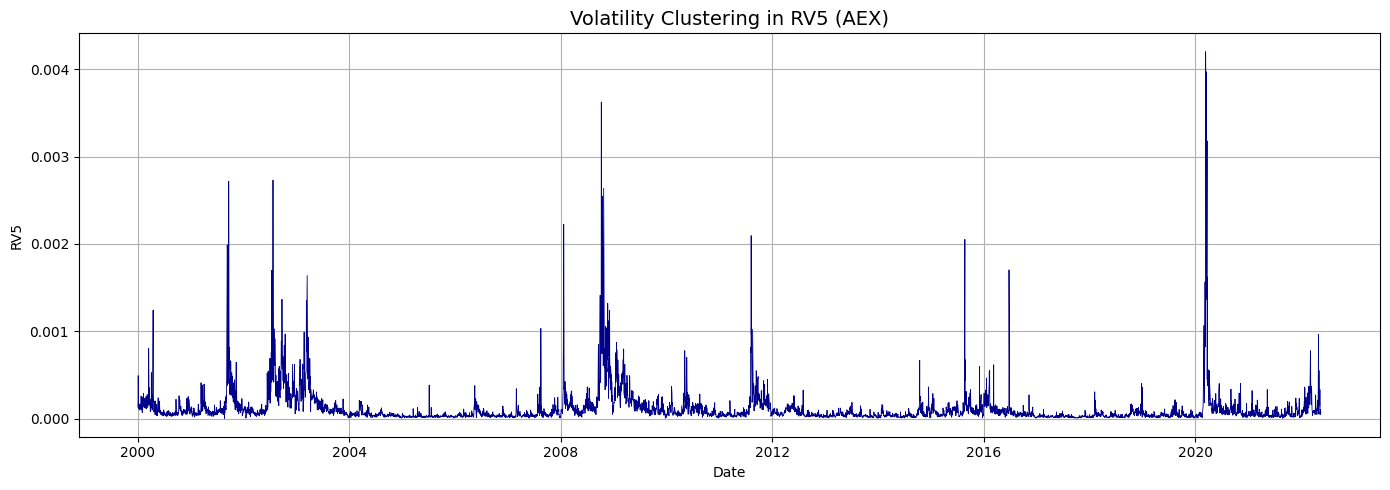

In [31]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['date'], df_clean['rv5'], color='darkblue', linewidth=0.6)
plt.title('Volatility Clustering in RV5 (AEX)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('RV5')
plt.grid(True)
plt.tight_layout()
plt.show()

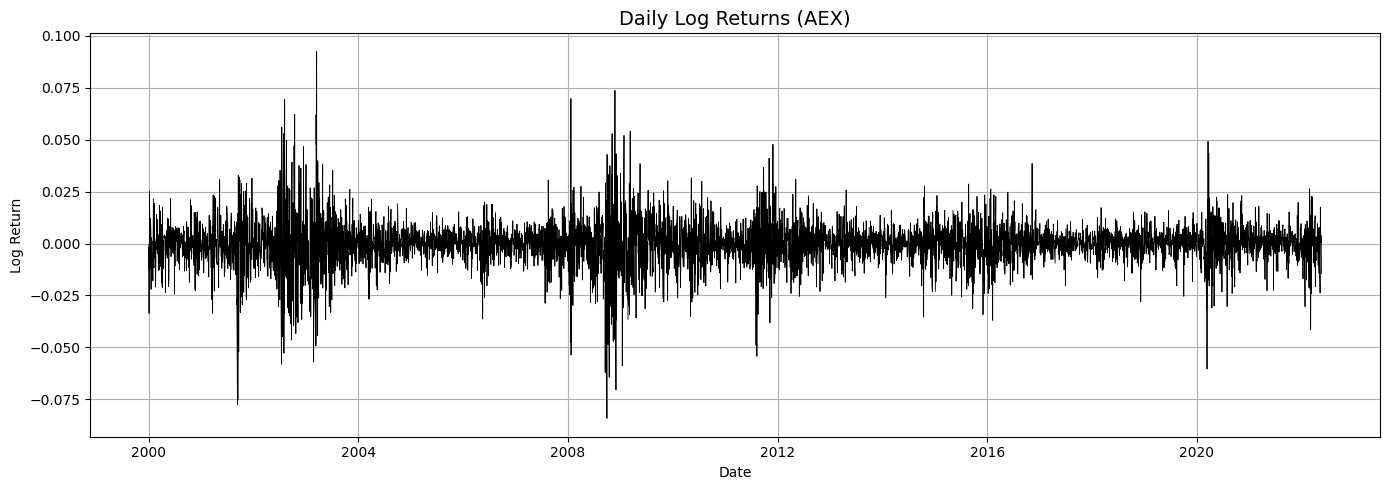

In [32]:
plt.figure(figsize=(14, 5))
plt.plot(df_clean['date'], df_clean['log_return'], color='black', linewidth=0.6)
plt.title('Daily Log Returns (AEX)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.tight_layout()
plt.show()

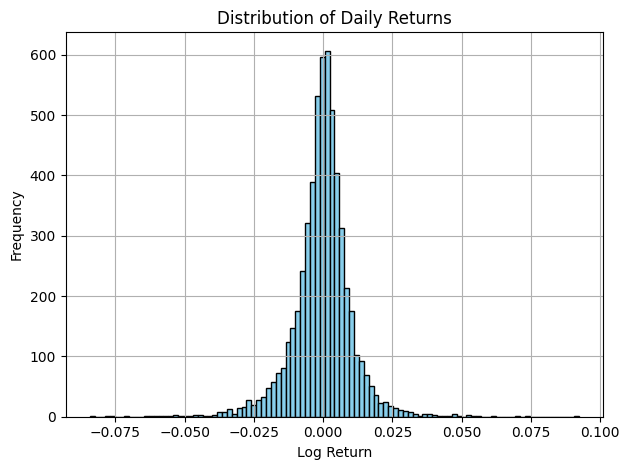

In [33]:
plt.hist(df_clean['log_return'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

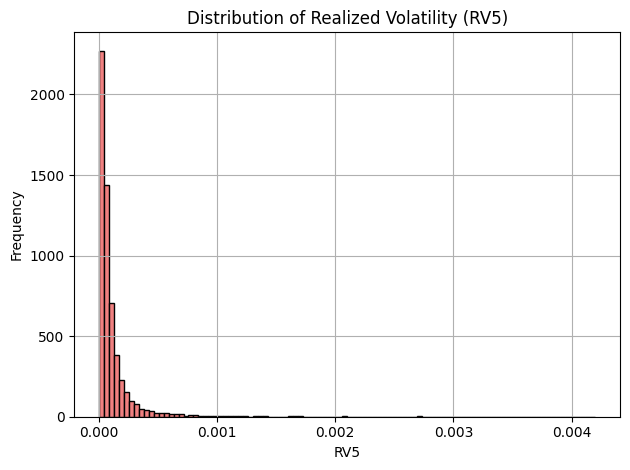

In [34]:
plt.hist(df_clean['rv5'], bins=100, color='lightcoral', edgecolor='black')
plt.title('Distribution of Realized Volatility (RV5)')
plt.xlabel('RV5')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

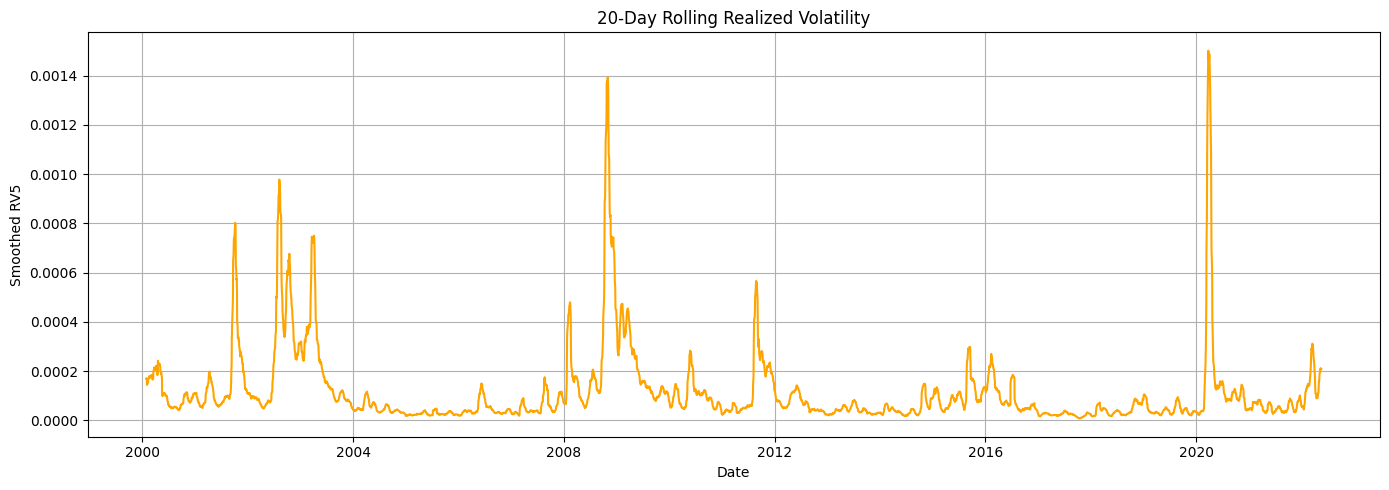

In [35]:
rolling_vol = df_clean['rv5'].rolling(window=20).mean()

plt.figure(figsize=(14, 5))
plt.plot(df_clean['date'], rolling_vol, color='orange')
plt.title('20-Day Rolling Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Smoothed RV5')
plt.grid(True)
plt.tight_layout()
plt.show()


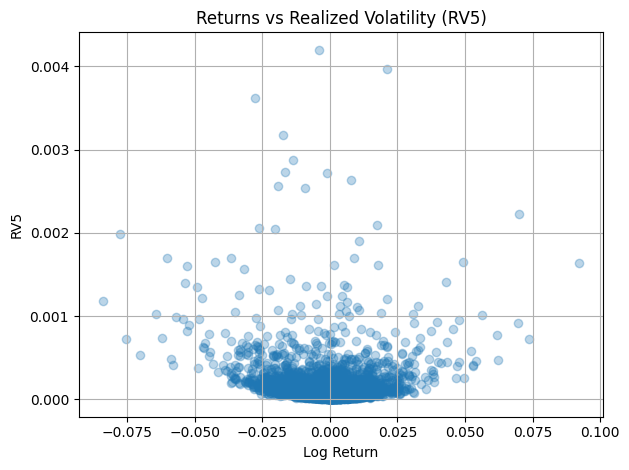

In [37]:
plt.scatter(df_clean['log_return'], df_clean['rv5'], alpha=0.3)
plt.title('Returns vs Realized Volatility (RV5)')
plt.xlabel('Log Return')
plt.ylabel('RV5')
plt.grid(True)
plt.tight_layout()
plt.show()